In [54]:
# each neuron get all the dimensional inputs that follow into the same partition. For example, 
# data [[0.01], 0.2], [0.2, [0.01]] both go a same neuron that accept x \in [0, 0.1]
#not working. 90% accuracy. 
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import numpy as np
from tensorboardX import SummaryWriter
import matplotlib.pyplot as plt
import time

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters 
input_size = 784
hidden_size = 100#800
num_classes = 10
batch_size = 100
learning_rate = 0.001
num_workers=0

num_epochs = 5

transform = transforms.ToTensor()
train_data = datasets.MNIST(root='/Users/dongcui/github/visualising-cnns/data', train=True,
                                   download=False, transform=transform)
test_data = datasets.MNIST(root='/Users/dongcui/github/visualising-cnns/data', train=False,
                                  download=False, transform=transform)

train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,
    num_workers=num_workers, shuffle = True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, 
    num_workers=num_workers, shuffle = True)

# def select_in_range(A, low, high):
#     '''
#     select a subset of signals from A that are in [low, high]
#     problem: result is 1-d. the input size is lost. 
#     '''
#     B = A[A > low]
#     C = B[B < high]
#     return C

# T = torch.randn(3, 2)
# print(T)
# print(select_in_range(T, 0, 0.3))

def thru(A, low, high):
    '''
    this preserves shape by inserting 0.  
    '''
    C = torch.gt(A, low) & torch.lt(A, high)
    CA = C.float() * A 
#     CA = C.float()  
#     CN = (CA - low) / (high - low)
#     return CN
#     return CA
    return CA

A = torch.randn(3,3)
print(A)
print(thru(A, 0, 1.0))



tensor([[-1.7078, -1.3304,  0.3373],
        [ 0.9284, -0.2285, -0.4497],
        [-0.2197, -0.7178, -1.7729]])
tensor([[-0.0000, -0.0000, 0.3373],
        [0.9284, -0.0000, -0.0000],
        [-0.0000, -0.0000, -0.0000]])


total #parameters: 159010
Epoch [1/5], Step [100/600], Loss: 1.1555
Epoch [1/5], Step [200/600], Loss: 0.8539
Epoch [1/5], Step [300/600], Loss: 0.5472
Epoch [1/5], Step [400/600], Loss: 0.5227
Epoch [1/5], Step [500/600], Loss: 0.4542
Epoch [1/5], Step [600/600], Loss: 0.4371
Epoch [2/5], Step [100/600], Loss: 0.3700
Epoch [2/5], Step [200/600], Loss: 0.3162
Epoch [2/5], Step [300/600], Loss: 0.2970
Epoch [2/5], Step [400/600], Loss: 0.3091
Epoch [2/5], Step [500/600], Loss: 0.2555
Epoch [2/5], Step [600/600], Loss: 0.2671
Epoch [3/5], Step [100/600], Loss: 0.3386
Epoch [3/5], Step [200/600], Loss: 0.2700
Epoch [3/5], Step [300/600], Loss: 0.2202
Epoch [3/5], Step [400/600], Loss: 0.2635
Epoch [3/5], Step [500/600], Loss: 0.1717
Epoch [3/5], Step [600/600], Loss: 0.2239
Epoch [4/5], Step [100/600], Loss: 0.1807
Epoch [4/5], Step [200/600], Loss: 0.1747
Epoch [4/5], Step [300/600], Loss: 0.1492
Epoch [4/5], Step [400/600], Loss: 0.1525
Epoch [4/5], Step [500/600], Loss: 0.1032
Epoch [4

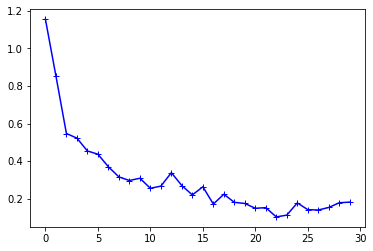

0.30399537036816277
tensor(1.)
torch.Size([100, 784])
sample size: torch.Size([100, 784])
Accuracy of the network on the 10000 test images: 91.8 %


In [57]:
class Thru(nn.Module):
    def __init__(self, low, high):
        '''
        Init method.
        '''
        super().__init__() # init the base class
        self.low = low
        self.high = high

    def forward(self, input):
        '''
        Forward pass of the function.
        '''
        return thru(input, self.low, self.high)

def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)
    
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        
        self.thru1 = Thru(0, 0.1)
        self.thru2 = Thru(0.1, 0.2)
        self.thru3 = Thru(0.2, 0.3)
        self.thru4 = Thru(0.3, 0.4)
        self.thru5 = Thru(0.4, 0.5)
        self.thru6 = Thru(0.5, 0.6)
        self.thru7 = Thru(0.6, 0.7)
        self.thru8 = Thru(0.7, 0.8)
        self.thru9 = Thru(0.8, 0.9)
        self.thru10 = Thru(0.9, 1.0)
        
        self.thru11 = Thru(0.05, 0.15)
        self.thru12 = Thru(0.15, 0.25)
        self.thru13 = Thru(0.25, 0.35)
        self.thru14 = Thru(0.35, 0.45)
        self.thru15 = Thru(0.45, 0.55)
        self.thru16 = Thru(0.55, 0.65)
        self.thru17 = Thru(0.65, 0.75)
        self.thru18 = Thru(0.75, 0.85)
        self.thru19 = Thru(0.85, 0.95)
        self.thru20 = Thru(0.95, 1.0)
        
        n = 10
        self.fc1 = nn.Linear(input_size, n) 
        self.fc2 = nn.Linear(input_size, n) 
        self.fc3 = nn.Linear(input_size, n) 
        self.fc4 = nn.Linear(input_size, n) 
        self.fc5 = nn.Linear(input_size, n) 
        self.fc6 = nn.Linear(input_size, n) 
        self.fc7 = nn.Linear(input_size, n) 
        self.fc8 = nn.Linear(input_size, n) 
        self.fc9 = nn.Linear(input_size, n) 
        self.fc10 = nn.Linear(input_size, n) 
        
        self.fc11 = nn.Linear(input_size, n) 
        self.fc12 = nn.Linear(input_size, n) 
        self.fc13 = nn.Linear(input_size, n) 
        self.fc14 = nn.Linear(input_size, n) 
        self.fc15 = nn.Linear(input_size, n) 
        self.fc16 = nn.Linear(input_size, n) 
        self.fc17 = nn.Linear(input_size, n) 
        self.fc18 = nn.Linear(input_size, n) 
        self.fc19 = nn.Linear(input_size, n) 
        self.fc20 = nn.Linear(input_size, n) 
        
        self.fc = nn.Linear(20*n, num_classes)
        
        #optional:
        self.relu = nn.ReLU()
    
    def forward(self, x):
        out = x
        
        out1 = self.thru1(out)
        out2 = self.thru2(out)
        out3 = self.thru3(out)
        out4 = self.thru4(out)
        out5 = self.thru5(out)
        out6 = self.thru6(out)
        out7 = self.thru7(out)
        out8 = self.thru8(out)
        out9 = self.thru9(out)
        out10 = self.thru10(out)
        
        out1 = self.fc1(out1)
        out2 = self.fc2(out2)
        out3 = self.fc3(out3)
        out4 = self.fc4(out4)
        out5 = self.fc5(out5)
        out6 = self.fc6(out6)
        out7 = self.fc7(out7)
        out8 = self.fc8(out8)
        out9 = self.fc9(out9)
        out10 = self.fc10(out10)
        
        out11 = self.thru11(out)
        out12 = self.thru12(out)
        out13 = self.thru13(out)
        out14 = self.thru14(out)
        out15 = self.thru15(out)
        out16 = self.thru16(out)
        out17 = self.thru17(out)
        out18 = self.thru18(out)
        out19 = self.thru19(out)
        out20 = self.thru20(out)
        
        out11 = self.fc11(out11)
        out12 = self.fc12(out12)
        out13 = self.fc13(out13)
        out14 = self.fc14(out14)
        out15 = self.fc15(out15)
        out16 = self.fc16(out16)
        out17 = self.fc17(out17)
        out18 = self.fc18(out18)
        out19 = self.fc19(out19)
        out20 = self.fc20(out20)
        
        out = torch.cat((out1, out2, out3, out4, out5, out6, out7, out8, out9, out10, out11, out12, out13, out14, out15, out16, out17, out18, out19, out20, ), dim=1)
        
        out = self.relu(out)
        
        out = self.fc(out)
        return out   

#now I can define my model
model = NeuralNet(input_size, hidden_size, num_classes).to(device)
print('total #parameters:', count_parameters(model))
#visualzing graphs
# writer=SummaryWriter('runs/experiment_1')
# dataiter=iter(train_loader)
# images, labels = dataiter.next()
# # print(images.shape)
# grid = torchvision.utils.make_grid(images)
# #writer.add_image('images', grid, 0)

# #images = images.reshape(-1, 28*28).to(device)
# dummy_input = torch.zeros(1, 28*28),
# writer.add_graph(model, dummy_input)
# writer.close()



start = time.time()

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  

# Train the model
total_step = len(train_loader)
losses=[]
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        # Move tensors to the configured device
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        #print(images[images<=1.0].shape[0])
        
        # Forward pass
        outputs  = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))
            losses.append(loss.item())
            

print('elapsed: ', time.time()-start)
plt.plot(losses, '-b+')
plt.show()
print(np.mean(losses))


#check dead neurons
dataiter=iter(train_loader)
images, labels = dataiter.next()
images = images.reshape(-1, 28*28).to(device)
print(torch.max(images[0]))#pixels are normalized

print(images.shape)
A1 = images[:100]
print("sample size:", A1.shape)
output = model(A1)

# output_relu = output_relu.T.detach()
# print("relu Size:", output_relu.shape)# interesting, data size is in second dimension. 
# # plt.plot(output_relu.numpy(), '-b+')
# # plt.show()
# print('Average Active Neurons =', np.count_nonzero(output_relu)/A1.shape[0])
# print('sparsity', 1- np.count_nonzero(output_relu)/ (output_relu.shape[0] * output_relu.shape[1]))

# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
labels_wrong = []
pred_wrong = []
img_wrong = []
with torch.no_grad():
    correct = 0
    total = 0
    for img, labels in test_loader:
#         print(img.shape)
        images = img.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        wrong_preds = (predicted != labels).numpy()
        wrong_index = []
        for (i, wrong) in enumerate(wrong_preds):
            if wrong:
                wrong_index.append(i) 
        if len(wrong_index) > 0:
            img_reshaped = img[wrong_index].numpy()[:,0,:,:]
            for img_w in range(img_reshaped.shape[0]):
                img_wrong.append(img_reshaped[img_w])
            labels_wrong  += (labels[wrong_index].numpy().tolist())
            pred_wrong += (predicted[wrong_index].numpy().tolist())
#     print(img_wrong)
#     print('img_wrong.shape', img_wrong[0].shape)
#     print('lables_wrong =', labels_wrong)
#     print('predictions wrong are:', pred_wrong)
    print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))

#show wrong images:
# print(len(img_wrong), ', ', len(labels_wrong), ', ', len(pred_wrong))
# for i in range(len(img_wrong)):
#     plt.imshow(img_wrong[i])
#     print('labels_wrong[i]:', labels_wrong[i])
#     print('pred_wrong[i]', pred_wrong[i])
#     plt.pause(1)

# Save the model checkpoint
# torch.save(model.state_dict(), 'model.ckpt')

In [72]:
print('Average Active Neurons =', np.count_nonzero(output_relu)/output_relu.shape[0])

print('layer 1:')
w_fc1 = list(model.fc1.parameters())
print(w_fc1)

print('layer 2:')
w_fc2 = list(model.fc2.parameters())
print(w_fc2)

Average Active Neurons = 37.462
layer 1:
[Parameter containing:
tensor([[ 0.0130, -0.0188, -0.0024,  ..., -0.0205, -0.0091, -0.0043],
        [ 0.0033, -0.0016,  0.0280,  ..., -0.0147, -0.0031,  0.0006],
        [ 0.0079,  0.0102,  0.0261,  ..., -0.0042, -0.0020, -0.0068],
        ...,
        [-0.0171,  0.0092,  0.0084,  ...,  0.0206,  0.0248,  0.0227],
        [ 0.0295,  0.0247,  0.0058,  ..., -0.0149,  0.0173, -0.0035],
        [ 0.0348,  0.0101,  0.0070,  ...,  0.0008,  0.0263, -0.0051]],
       requires_grad=True), Parameter containing:
tensor([ 4.5606e-02, -8.7214e-03,  6.5915e-02, -2.7034e-02,  4.6711e-02,
         3.8341e-02,  1.8096e-02,  1.7200e-02,  3.2345e-02, -6.4435e-02,
        -1.9535e-02,  3.6509e-02,  1.8641e-02,  2.1812e-02, -6.9894e-02,
        -3.1382e-02, -4.6306e-02,  1.7369e-01, -1.7433e-02,  3.5536e-02,
        -1.5135e-02, -4.6255e-02, -1.6067e-02,  3.7119e-02, -5.2715e-03,
         1.9340e-02, -5.4811e-02, -3.1189e-02,  1.0628e-01, -5.9413e-02,
         3.256

Accuracy of the network on the 10000 test images: 98.1 %


In [ ]:
#future work
def relu_at(A, threshold):
    return torch.max(A, torch.ones_like(A) * threshold)

def relu_min_at(A, threshold):
    return torch.min(A, torch.ones_like(A) * threshold)

class ThresholdingNet2(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(ThresholdingNet2, self).__init__()
        self.maxlu = ReLU_my()
        self.minlu = ReLU_min()
        self.fc1 = nn.Linear(input_size*2, hidden_size) 
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = x
        
        out1 = self.maxlu(out)
        out2 = self.minlu(out)
        out = torch.cat((out1, out2), dim=1)
        out = self.fc1(out)
        out = self.relu(out)
        out = self.fc2(out)
        return out  
    
# model = ThresholdingNet(input_size, hidden_size, num_classes).to(device)
model = ThresholdingNet2(input_size, hidden_size, num_classes).to(device)